In [ ]:
# Mount your own google drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')
import sys
# Change the path below to the path where your folder locates
sys.path.append('/content/gdrive/MyDrive/')
import time

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

In [ ]:
######################################################################
# classes
######################################################################

class Data :

    def __init__(self, X=None, y=None) :
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]

    def plot(self, **kwargs) :
        """Plot data."""

        if 'color' not in kwargs :
            kwargs['color'] = 'b'

        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [ ]:
class PolynomialRegression() :

    def __init__(self, m=1) :
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m


    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n,d = X.shape

        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model

        X = np.append(np.ones([n,1]), X, 1)

        # part g: modify to create matrix for polynomial model

        Phi = np.ones([n,1])
        m = self.m_
        for i in range(1, m + 1):
          Phi = np.append(Phi, X ** i, 1)

        ### ========== TODO : END ========== ###

        return Phi


    def fit_GD(self, X, y, eta=0.01,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """

        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()

        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration

        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None:
                k = tmax
                eta = 1/(1+k)  # change this line
            else:
                eta = eta_input
            ### ========== TODO : END ========== ###

            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            weights = np.array(list(self.coef_))
            for ind, val in enumerate(self.coef_):
              tot = 0
              for j, x in enumerate(X):
                tot += (np.dot(weights, x) - y[j]) * x[ind] # wj <- wj - 2x_n * sum(h_w(x_n)-y_n)x_nj
              # change the weights
              self.coef_[ind] += (-2) * eta * tot
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X, np.transpose(self.coef_)) # change this line
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
            ### ========== TODO : END ========== ###

            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break

            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec

        print('number of iterations: %d'%(t+1))

        return self


    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        #print("part_e")
        start_time = time.time()
        self.coef_ = (np.linalg.pinv(np.dot(np.transpose(X),X)).dot(np.transpose(X))).dot(y)
        stop_time = time.time()
        run_time = stop_time - start_time
        #print(f"coefficient:{self.coef_}\trun time:{run_time}")
        ### ========== TODO : END ========== ###


    def predict(self, X) :
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part c: predict y
        y = None
        y = np.dot(X, np.transpose(self.coef_))
        ### ========== TODO : END ========== ###

        return y


    def cost(self, X, y) :
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        cost = 0
        h = self.predict(X)
        for ind, j in enumerate(h):
          # calculate the sum of j(w)
          # sum of (h(xn)-yn)**2
          cost += (h[ind] - y[ind]) ** 2
        ### ========== TODO : END ========== ###
        return cost


    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        n, d = X.shape
        error = np.sqrt(self.cost(X,y)/n)
        ### ========== TODO : END ========== ###
        return error


    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'

        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

Visualizing data...


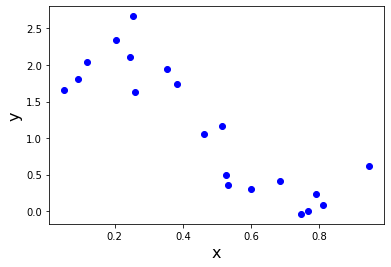

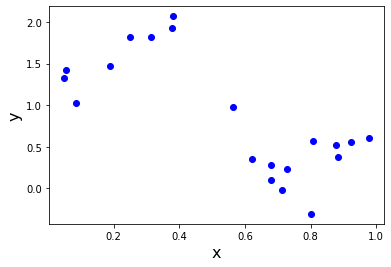

part_d 3
number of iterations: 10000
model.coef_:[ 1.1592774   1.1592774  -2.55115343]	eta: 0.0001	model_cost:4.008453199384464
number of iterations: 6360
model.coef_:[ 1.22320342  1.22320342 -2.81635305]	eta: 0.001	model_cost:3.912576405791857
number of iterations: 690
model.coef_:[ 1.22320352  1.22320352 -2.81635347]	eta: 0.01	model_cost:3.9125764057914836


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-64-de2a63bd716c>:108: RuntimeWarning: overflow encountered in power
  err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
<ipython-input-64-de2a63bd716c>:112: RuntimeWarning: invalid value encountered in subtract
  if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
<ipython-input-64-de2a63bd716c>:102: RuntimeWarning: overflow encountered in double_scalars
  tot += (np.dot(weights, x) - y[j]) * x[ind] # wj <- wj - 2x_n * sum(h_w(x_n)-y_n)x_nj
<ipython-input-64-de2a63bd716c>:104: RuntimeWarning: invalid value encountered in double_scalars
  self.coef_[ind] += (-2) * eta * tot


number of iterations: 10000
model.coef_:[nan nan nan]	eta: 0.1	model_cost:nan
Investigating polynomial regression...


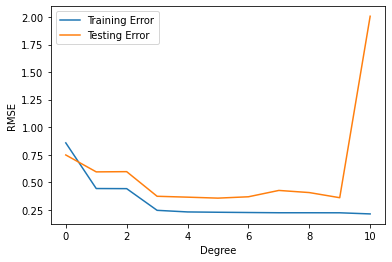

(0, 0.8570606234439588, 0.7472683641851717)
(1, 0.4422994690134426, 0.5935949636028283)
(2, 0.441314965682919, 0.5957110445316885)
(3, 0.24426921898418785, 0.3719429761720453)
(4, 0.22968276125805603, 0.3639317200216914)
(5, 0.22681133051783198, 0.35513774288373506)
(6, 0.2244529482800519, 0.36745016914396894)
(7, 0.2222819395206791, 0.42500829910801513)
(8, 0.2222605749613229, 0.40566909592730227)
(9, 0.22189350953278547, 0.3589840084287037)
(10, 0.2116891663951482, 2.0076559004237606)
Done!


In [ ]:
######################################################################
# main
######################################################################

def main() :
    # load data
    # Use the abs path on your own Google Drive
    train_data = load_data('/content/gdrive/MyDrive/regression_train.csv')
    test_data = load_data('/content/gdrive/MyDrive/regression_test.csv')

    # print(train_data.X.shape, train_data.y.shape)
    # print(test_data.X.shape, test_data.y.shape)


    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    model = PolynomialRegression(1)
    print('Visualizing data...')
    plot_data( train_data.X,train_data.y )
    plot_data( test_data.X,test_data.y )
    print("part_d 3")

    eta_list = [pow(10, -4), pow(10, -3), pow(10, -2), 0.1]
    for e in eta_list:
      model.fit_GD(train_data.X, train_data.y, eta=e)
      print(f"model.coef_:{model.coef_}\teta: {e}\tmodel_cost:{model.cost(train_data.X, train_data.y)}")

    ### ========== TODO : END ========== ###


    '''
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    print(model.cost(train_data.X, train_data.y))
    ### ========== TODO : END ========== ###

    model.fit(train_data.X, train_data.y)
    print("part_f")
    start_time = time.time()
    model.fit_GD(train_data.X, train_data.y)
    stop_time = time.time()
    run_time = stop_time - start_time
    print(f"Coefficient: {model.coef_}\tTime: {run_time}")
    '''
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print("Investigating polynomial regression...")
    train = []
    test = []

    #set up values
    X_train = train_data.X
    y_train = train_data.y
    X_test = test_data.X
    y_test = test_data.y
    x_val = np.arange(11)

    for deg in range(11):
      model = PolynomialRegression(deg)
      model.fit(X_train, y_train)
      train.append(model.rms_error(X_train, y_train))
      test.append(model.rms_error(X_test, y_test))

    plt.plot(x_val, train,  label="Training Error")
    plt.plot(x_val, test,  label="Testing Error")
    plt.xlabel("Degree")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

    ### ========== TODO : END ========== ###


    for x in list(zip(x_val, train, test)):
      print(x)

    print("Done!")

if __name__ == "__main__":
    main()
